In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# ✅ Q1 – Annual Crime Trends (2001–2013)

Question:
- Compute the total number of victims per year and analyze any patterns or fluctuations in crime rates over the years (2001–2012).

Files of Use:
- 01_District_wise_crimes_committed_IPC_2001_2012.csv
- 01_District_wise_crimes_committed_IPC_2013.csv
- 01_District_wise_crimes_committed_IPC_2014.csv

Useful Columns
- STATE/UT
- YEAR
- TOTAL IPC CRIMES

## 🔹 Step 1: Loading The Dataset for the year 2001 - 2013

In [ ]:
# Load the main IPC crimes file (2001–2012)
ipc_df_2012 = pd.read_csv(r"E:\0. VS Code\PrepGrad Minor project csvs\01_District_wise_crimes_committed_IPC_2001_2012.csv")
ipc_df_2013 = pd.read_csv(r"E:\0. VS Code\PrepGrad Minor project csvs\01_District_wise_crimes_committed_IPC_2013.csv")

# Merge the two dataframes
ipc_df = pd.concat([ipc_df_2012, ipc_df_2013], ignore_index=True)

## 🔹 Step 2: Clean Column Names

In [13]:
# Normalize column names: remove whitespace, lowercase, and replace spaces
ipc_df.columns = ipc_df.columns.str.strip().str.upper().str.replace(' ', '_')

## 🔹 Step 3: Checking Column Info and null values

In [23]:
ipc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9840 non-null   object
 1   DISTRICT                                             9840 non-null   object
 2   YEAR                                                 9840 non-null   int64 
 3   MURDER                                               9840 non-null   int64 
 4   ATTEMPT_TO_MURDER                                    9840 non-null   int64 
 5   CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER            9840 non-null   int64 
 6   RAPE                                                 9840 non-null   int64 
 7   CUSTODIAL_RAPE                                       9840 non-null   int64 
 8   OTHER_RAPE                                           9840 non-null   int64 
 9

In [14]:
# Preview columns to identify crime columns
ipc_df.columns.tolist()

['STATE/UT',
 'DISTRICT',
 'YEAR',
 'MURDER',
 'ATTEMPT_TO_MURDER',
 'CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER',
 'RAPE',
 'CUSTODIAL_RAPE',
 'OTHER_RAPE',
 'KIDNAPPING_&_ABDUCTION',
 'KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS',
 'KIDNAPPING_AND_ABDUCTION_OF_OTHERS',
 'DACOITY',
 'PREPARATION_AND_ASSEMBLY_FOR_DACOITY',
 'ROBBERY',
 'BURGLARY',
 'THEFT',
 'AUTO_THEFT',
 'OTHER_THEFT',
 'RIOTS',
 'CRIMINAL_BREACH_OF_TRUST',
 'CHEATING',
 'COUNTERFIETING',
 'ARSON',
 'HURT/GREVIOUS_HURT',
 'DOWRY_DEATHS',
 'ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY',
 'INSULT_TO_MODESTY_OF_WOMEN',
 'CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES',
 'IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES',
 'CAUSING_DEATH_BY_NEGLIGENCE',
 'OTHER_IPC_CRIMES',
 'TOTAL_IPC_CRIMES']

## 🔹 Step 4: Group by Year

In [15]:
# Group by YEAR to get total crimes per year
yearly_trend = ipc_df.groupby('YEAR')['TOTAL_IPC_CRIMES'].sum().reset_index()
yearly_trend

,YEAR,TOTAL_IPC_CRIMES
0,2001,3538616
1,2002,3560660
2,2003,3432240
3,2004,3664020
4,2005,3645204
5,2006,3756586
6,2007,3979346
7,2008,4186758
8,2009,4242690
9,2010,4449662


## 🔹 Step 5: Visualization

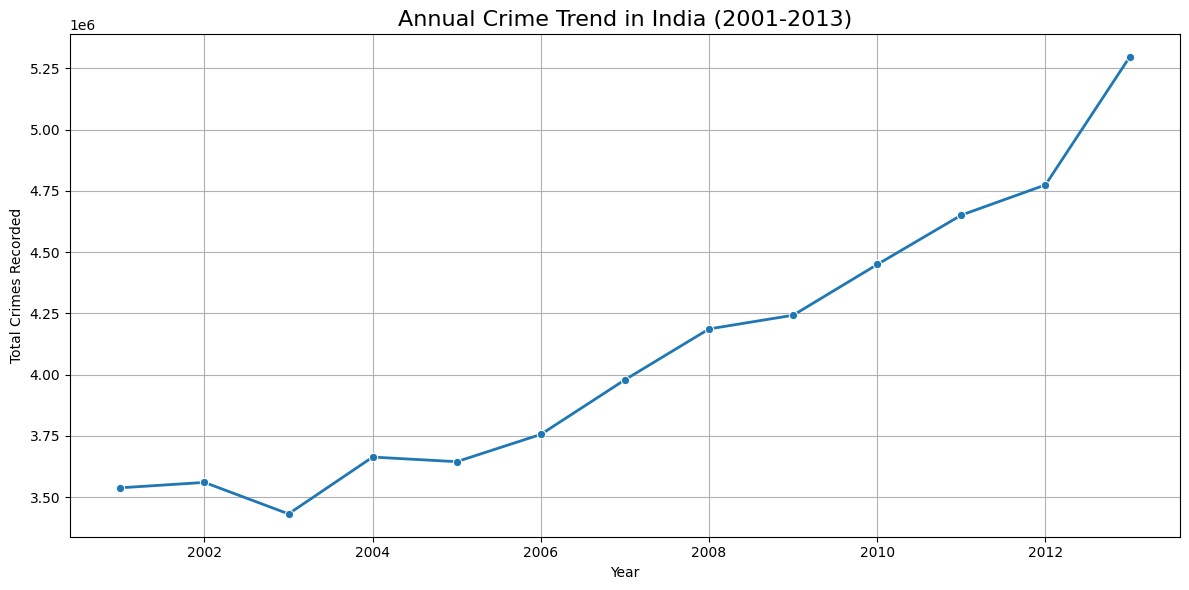

In [ ]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trend, x='YEAR', y='TOTAL_IPC_CRIMES', marker='o', linewidth=2)

plt.title('Annual Crime Trend in India (2001-2013)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Crimes Recorded')
plt.grid(True)
plt.tight_layout()
plt.show()


## 🔍 Observation

- The graph highlights the trend of total crime victims recorded in India from 2001 to 2012.

- Trend: Crime numbers increased steadily from 2001 to 2011, with a slight dip in 2004 and 2008.

- There appears to be a steady increase in crime over the years, which may be influenced by population growth, improved crime reporting, or socio-political changes.

- Spike: A significant spike can be observed in 2011–2012, which could be explored further in later questions.

# ✅ Q2: State-Wise Crime Analysis (2001–2013)